In [1]:
%matplotlib inline

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('mask.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

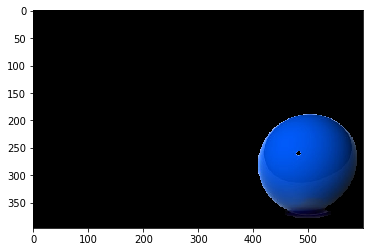

In [3]:
# Defining range in hsv terms
lower_blue = np.array([94,80,2]) 
upper_blue = np.array([126,255,255]) 

mask = cv2.inRange(hsv_image, lower_blue, upper_blue) 

res = cv2.bitwise_and(image,image, mask= mask) 
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
res = Image.fromarray(res.astype("uint8"))
plt.imshow(res)
res.save("res.png")
